In [1]:
import pandas as pd
import numpy as np
import pdfplumber
import re
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
#test first page
pdf = pdfplumber.open("pdfs-2022-to-2023/2022-OCT-2023-OCT-CompStat_Incident_Report_d2310.pdf")
first_page = pdf.pages[3]

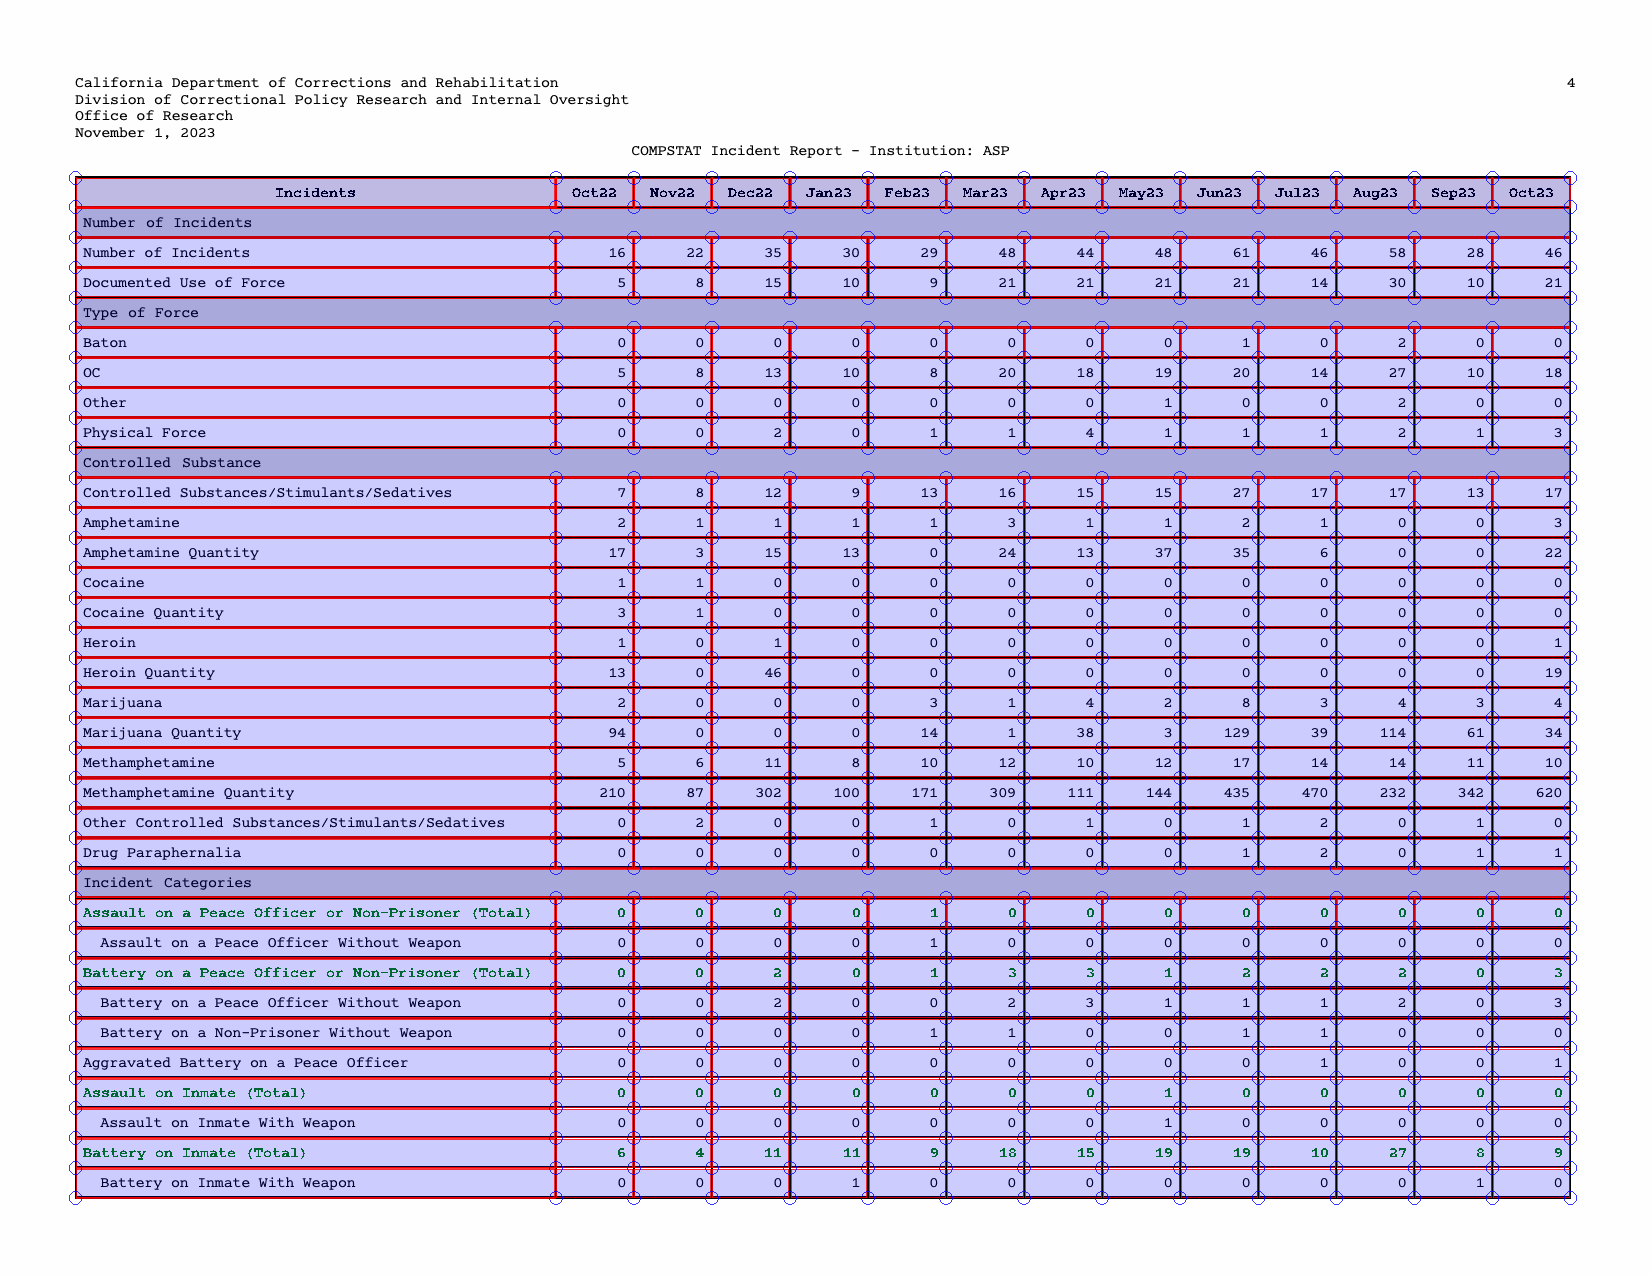

In [5]:
im = first_page.to_image(resolution=150)
im.reset().debug_tablefinder()

In [6]:
#Get the first row from the first page as headers
columns = first_page.extract_table()[0][1:]
columns.insert(0, 'Institution')

df = pd.DataFrame(columns=columns)

def parse_value(x):
    if x == "": return np.nan
    if x == None: return np.nan
    return x.replace(',', '').replace('\n', ' ')

#loop through each page
for page in pdf.pages[3:]:
    table              = page.extract_table()
    institution        = re.sub(r'^.*?:\s(\w+).*?$', r'\1', page.crop((415, 70, 500, 80)).extract_text())
    this_pages_headers = table[0] #some pages have fewer headers
    for row in table[1:]:
        if 'Documented Use of Force' in row:
            row_object  = {}
            row_object['Institution'] = institution
            for i,cell in enumerate(row[1:]):
                row_object[this_pages_headers[i+1]] = parse_value(cell)

            df   = pd.concat([df, pd.DataFrame([row_object])], ignore_index=True)

df

,Institution,Oct22,Nov22,Dec22,Jan23,Feb23,Mar23,Apr23,May23,Jun23,Jul23,Aug23,Sep23,Oct23
0,ASP,5,8,15,10,9,21,21,21,21,14,30,10,21
1,CAC,12,4,4,7,4,7,6,2,0,0,0,NaN,NaN
2,CAL,4,3,10,5,6,13,17,12,20,15,13,2,22
3,CCC,1,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CCI,41,38,29,34,44,19,23,19,24,23,37,27,17
5,CCWF,21,26,25,26,19,17,23,23,27,32,32,22,26
6,CEN,10,7,7,8,12,7,13,10,8,10,10,8,14
7,CHCF,21,21,11,23,12,27,23,32,27,31,34,25,31
8,CIM,5,2,8,3,2,1,1,1,2,6,1,3,3
9,CIW,3,8,5,7,10,4,7,2,9,6,11,11,4


In [8]:
df_melted = df.melt(id_vars=['Institution'],var_name='Month',value_name='Use of Force')
df_melted.head()

,Institution,Month,Use of Force
0,ASP,Oct22,5
1,CAC,Oct22,12
2,CAL,Oct22,4
3,CCC,Oct22,1
4,CCI,Oct22,41


In [23]:
df_melted['Year'] = '20' + df_melted['Month'].str.split(r'(\w{3})(\d{2})').str[2]
df_melted['Month'] = df_melted['Month'].str.split(r'(\w{3})(\d{2})').str[1]
df_melted

,Institution,Month,Use of Force,Year
0,ASP,Oct,5,2022
1,CAC,Oct,12,2022
2,CAL,Oct,4,2022
3,CCC,Oct,1,2022
4,CCI,Oct,41,2022
...,...,...,...,...
437,SOL,Oct,15,2023
438,SQ,Oct,7,2023
439,SVSP,Oct,61,2023
440,VSP,Oct,5,2023


In [24]:
df_melted.to_csv("finished-csvs/finished-2022-2023-UOF.csv", encoding="utf-8", index=False)